In [25]:
# import images
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [26]:
# load picture
image_folder = "images"
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith((".jpeg", ".jpg"))]

if not image_files:
    raise FileNotFoundError("no picture found in images-folder")

image_path = os.path.join(image_folder, image_files[0])
img = cv2.imread(image_path)


In [27]:
# convert in grayscale and blur lightly
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [28]:
# apply threshold
_, thresh = cv2.threshold(blurred, 200, 225, cv2.THRESH_BINARY)

# find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [29]:
# draw boundings around the contours
output = img.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 8 and h > 8: #ignore small contours
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)


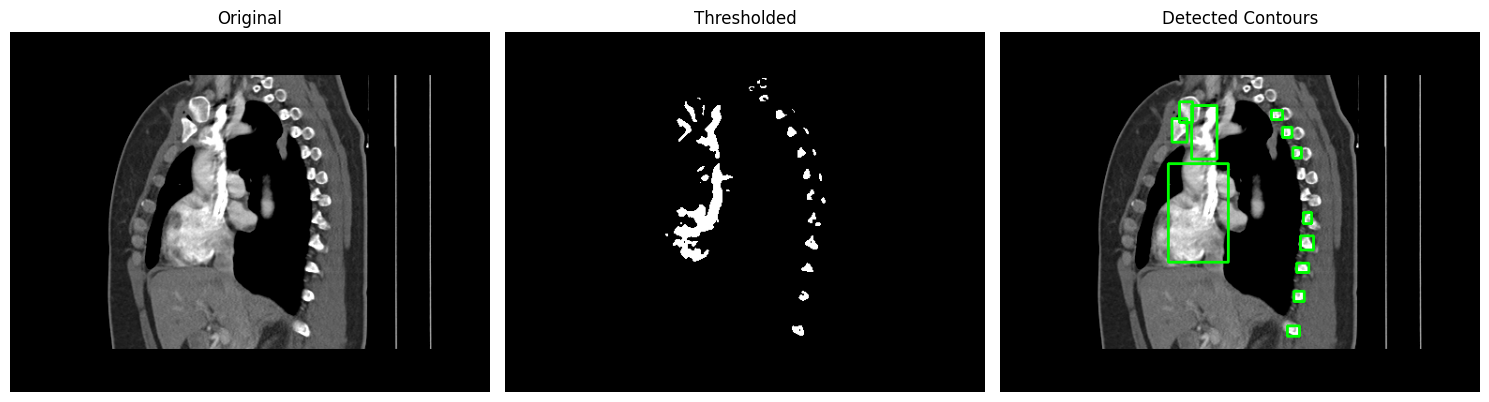

In [30]:
#plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Contours")
plt.axis("off")

plt.tight_layout()
plt.show()